<a href="https://colab.research.google.com/github/eftekhar-hossain/CUET_NLP-EACL_2021/blob/main/test_set_evaluation_(offensive_text).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Libraries

In [ ]:
%%time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings
result_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/EACL 2021- Shared Tasks/Offensive Language/Test Set Evaluation/"
folder_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/EACL 2021- Shared Tasks/Offensive Language/"


CPU times: user 402 ms, sys: 183 ms, total: 585 ms
Wall time: 964 ms


#Evaluation Metrices

In [ ]:
def print_metrices(true,pred,class_names):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
def con_mat(true,pred,class_names,language):
  
  cm = confusion_matrix(true,pred)
  #sns.set()
  plt.figure(figsize =(5, 3))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True,fmt="d",cmap='Blues', ax = ax,annot_kws={"size": 12}) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels') 
  #ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(class_names, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
  ax.xaxis.tick_top()
  plt.savefig(f"{language}.png",bbox_inches='tight',dpi =600)

# Tamil Result

In [ ]:
### Actual Test labels
actual_labels = pd.read_csv(result_path+'tamil_offensive_full_test_with_labels.csv',delimiter='\t',header = None)
actual_labels  = actual_labels.drop(columns=2)
actual_labels  = actual_labels.rename(columns={0:'text',1:'label'})
actual_labels 

In [ ]:
actual_labels['label'].value_counts()

Not_offensive                           3190
Offensive_Untargetede                    368
Offensive_Targeted_Insult_Individual     315
Offensive_Targeted_Insult_Group          288
not-Tamil                                160
Offensive_Targeted_Insult_Other           71
Name: label, dtype: int64

In [ ]:
### Predicted Labels for all the models
predicted_labels = pd.read_excel(result_path +'tamil-test-predictions.xlsx')
model_names = predicted_labels.columns.values.tolist()
model_names= model_names[1:]
model_names


In [ ]:
for i in model_names:
  print("Model Name: ----> ",i,"\n")
  print_metrices(actual_labels['label'],predicted_labels[i],classes)
  print('\n')

Model Name: ---->  xlm-4 

[[2984   64   65    0   63   14]
 [ 146   77   24    0   40    1]
 [ 128   33  123    0   31    0]
 [  38    9    9    0   15    0]
 [ 165   44   33    0  123    3]
 [  28    1    2    0    3  126]]
                                      precision    recall  f1-score   support

                       Not_offensive       0.86      0.94      0.89      3190
     Offensive_Targeted_Insult_Group       0.34      0.27      0.30       288
Offensive_Targeted_Insult_Individual       0.48      0.39      0.43       315
     Offensive_Targeted_Insult_Other       0.00      0.00      0.00        71
               Offensive_Untargetede       0.45      0.33      0.38       368
                           not-Tamil       0.88      0.79      0.83       160

                            accuracy                           0.78      4392
                           macro avg       0.50      0.45      0.47      4392
                        weighted avg       0.75      0.78      0.76   

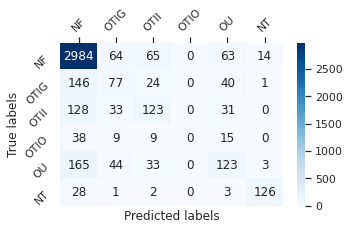

In [ ]:
con_mat(actual_labels['label'],predicted_labels['xlm-4'],class_names=['NF','OTIG','OTII','OTIO','OU','NT'],language='tamil')

#Malayalam Result

In [ ]:
### Actual Test labels
actual_labels_mala = pd.read_csv(result_path+'mal_full_offensive_test_with_labels.csv',delimiter='\t',header = None)
actual_labels_mala  = actual_labels_mala.drop(columns=2)
actual_labels_mala  = actual_labels_mala.rename(columns={0:'text',1:'label'})
classes = np.unique(actual_labels_mala.label)
actual_labels_mala

In [ ]:
actual_labels_mala['label'].value_counts()

Not_offensive                           1765
not-malayalam                            157
Offensive_Untargetede                     29
Offensive_Targeted_Insult_Individual      27
Offensive_Targeted_Insult_Group           23
Name: label, dtype: int64

In [ ]:
### Predicted Labels for all the models
predicted_labels_mala = pd.read_excel(result_path +'mala-test-predictions.xlsx')
model_names = predicted_labels_mala.columns.values.tolist()
model_names= model_names[1:]
model_names


['xlm-4',
 'm-bert-cw',
 'indic-bert',
 'indic-bert-cw',
 'cnn-lstm-fasttext',
 'cnn-lstm',
 'LR',
 'SVM',
 'ensemble',
 'cnn-attn']

In [ ]:
for i in model_names:
  print("Model Name: ----> ",i,"\n")
  print_metrices(actual_labels_mala['label'],predicted_labels_mala[i],classes)
  print('\n')

Model Name: ---->  xlm-4 

[[1733    0    0   12   20]
 [  15    0    0    8    0]
 [  24    0    0    2    1]
 [  15    0    0   14    0]
 [  17    0    0    0  140]]
                                      precision    recall  f1-score   support

                       Not_offensive       0.96      0.98      0.97      1765
     Offensive_Targeted_Insult_Group       0.00      0.00      0.00        23
Offensive_Targeted_Insult_Individual       0.00      0.00      0.00        27
               Offensive_Untargetede       0.39      0.48      0.43        29
                       not-malayalam       0.87      0.89      0.88       157

                            accuracy                           0.94      2001
                           macro avg       0.44      0.47      0.46      2001
                        weighted avg       0.92      0.94      0.93      2001

Accuracy :  0.9430284857571214
Precison :  0.9212066163432738
Recall :  0.9430284857571214
F1 :  0.931931066507557


Model Name

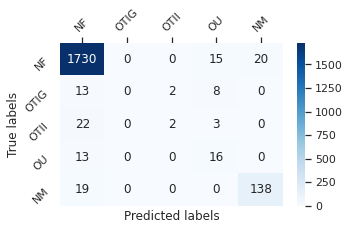

In [ ]:
con_mat(actual_labels_mala['label'],predicted_labels_mala['indic-bert'],class_names=['NF','OTIG','OTII','OU','NM'],language='mala')

#Kannada Result

In [ ]:
### Actual Test labels
actual_labels_kan = pd.read_excel(result_path+'kannada_offensive_test_with_labels.xlsx')
classes = np.unique(actual_labels_kan.Label)
actual_labels_kan

In [ ]:
actual_labels_kan['Label'].value_counts()

Not_offensive                           427
not-Kannada                             185
Offensive_Targeted_Insult_Individual     75
Offensive_Targeted_Insult_Group          44
Offensive_Untargetede                    33
Offensive_Targeted_Insult_Other          14
Name: Label, dtype: int64

In [ ]:
### Predicted Labels for all the models
predicted_labels_kan = pd.read_excel(result_path +'kannada-test-predictions.xlsx')
model_names = predicted_labels_kan.columns.values.tolist()
model_names= model_names[1:]
model_names


['xlm-r',
 'm-bert',
 'indic-bert',
 'lstm',
 'lstm-fattext',
 'LR',
 'SVM',
 'ensemle',
 'lstm-attn']

In [ ]:
for i in model_names:
  print("Model Name: ----> ",i,"\n")
  print_metrices(actual_labels_kan['Label'],predicted_labels_kan[i],classes)
  print('\n')

Model Name: ---->  xlm-r 

[[308  20  20   2  19  58]
 [ 14  17   5   3   1   4]
 [ 18   3  50   0   3   1]
 [  6   3   1   1   2   1]
 [ 18   2   5   0   7   1]
 [ 15   3   1   1   0 165]]
                                      precision    recall  f1-score   support

                       Not_offensive       0.81      0.72      0.76       427
     Offensive_Targeted_Insult_Group       0.35      0.39      0.37        44
Offensive_Targeted_Insult_Individual       0.61      0.67      0.64        75
     Offensive_Targeted_Insult_Other       0.14      0.07      0.10        14
               Offensive_Untargetede       0.22      0.21      0.22        33
                         not-Kannada       0.72      0.89      0.80       185

                            accuracy                           0.70       778
                           macro avg       0.48      0.49      0.48       778
                        weighted avg       0.71      0.70      0.70       778

Accuracy :  0.7043701799485

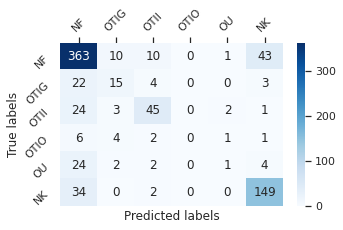

In [ ]:
con_mat(actual_labels_kan['Label'],predicted_labels_kan['m-bert'],class_names=['NF','OTIG','OTII','OTIO','OU','NK'],language='kannada')